### Predicting Song Popularity: Data-Driven Insights from Spotify and YouTube

**Introduction:**

In today’s digital age, music streaming platforms like Spotify and YouTube play a pivotal role in shaping musical trends and determining the popularity of songs. Music popularity is no longer just about catchy melodies and memorable lyrics; instead, it involves a complex blend of various musical, technical, and social metrics. Analyzing the underlying elements that make a song resonate with a broad audience can provide valuable insights for artists, producers, and music marketers. This dataset, gathered from Spotify and YouTube, captures diverse attributes of songs, ranging from acoustic qualities like danceability and loudness to social metrics like views, likes, and streams. Here, the number of streams on Spotify serves as a proxy for a song’s popularity, offering a measurable indicator of listener engagement and appeal.

**Objective:**

The objective of this study is to dissect each song’s components using a rich dataset of 26 variables, aiming to uncover patterns that differentiate highly popular songs from less popular ones. By examining attributes such as energy, valence, tempo, and social engagement metrics, we seek to identify the key elements that contribute to a song’s appeal and longevity on streaming and video platforms. This analysis will ultimately provide a data-driven perspective on what makes a song popular, guiding industry strategies for creating and promoting future hits.

In [99]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from boruta import BorutaPy
from BorutaShap import BorutaShap
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf
from colorama import Fore, Style
from scipy import stats
import patsy as pt
import pandas as pd
from patsy import dmatrices
import statsmodels.formula.api as smf
from simple_colors import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic as sms
import math 

#### 1. Data Loading and Cleaning

In [372]:
# Download latest version
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Path to dataset files: /Users/raghavirajumohan/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2


In [373]:
# Define the path to the dataset folder
dataset_folder = "/Users/raghavirajumohan/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2"

# List all files in the directory

files = os.listdir(dataset_folder)
print("Files in dataset folder:", files)

Files in dataset folder: ['Spotify_Youtube.csv']


## Checking the Data

In [374]:
# Load the dataset
csv_file = os.path.join(dataset_folder, "Spotify_Youtube.csv")  # Replace "filename.csv" with the actual filename
data = pd.read_csv(csv_file)
data = data.drop(data.columns[0], axis=1)

# Display the first few rows
data

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [375]:
data.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [376]:
data = data.dropna().reset_index(drop=True)

In [377]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Danceability,19170.0,6.200000e-01,1.700000e-01,0.00,0.52,0.64,7.400000e-01,9.800000e-01
Energy,19170.0,6.400000e-01,2.100000e-01,0.00,0.51,0.67,8.000000e-01,1.000000e+00
Key,19170.0,5.290000e+00,3.580000e+00,0.00,2.00,5.00,8.000000e+00,1.100000e+01
Loudness,19170.0,-7.620000e+00,4.620000e+00,-46.25,-8.74,-6.50,-4.920000e+00,9.200000e-01
Speechiness,19170.0,9.000000e-02,1.000000e-01,0.00,0.04,0.05,1.000000e-01,9.600000e-01
Acousticness,19170.0,2.900000e-01,2.900000e-01,0.00,0.04,0.19,4.700000e-01,1.000000e+00
Instrumentalness,19170.0,6.000000e-02,1.900000e-01,0.00,0.00,0.00,0.000000e+00,1.000000e+00
Liveness,19170.0,1.900000e-01,1.700000e-01,0.01,0.09,0.12,2.300000e-01,1.000000e+00
Valence,19170.0,5.300000e-01,2.400000e-01,0.00,0.34,0.54,7.200000e-01,9.900000e-01
Tempo,19170.0,1.206100e+02,2.959000e+01,0.00,97.00,119.97,1.399500e+02,2.433700e+02


### Data Pre-processing 

1. **Binary Encoding for Licensed and official_video**
   - Convert `Licensed` and `official_video` into binary variables (0 and 1) to make them compatible with machine learning models.

2. **Encoding for Album_type**
   - If `Album_type` has multiple categories, create binary indicators for each (e.g., `Album_type_compilation` and `Album_type_single`). If binary, a single indicator is sufficient.

3. **Log Transformation for Highly Skewed Variables**
   - Apply a log transformation to variables like `Views`, `Likes`, `Comments`, and `Stream` to normalize distributions and reduce the impact of outliers.

4. **Square Root Transformation for Moderately Skewed Variables**
   - For variables like `Duration_ms`, a square root transformation may reduce skewness. Check the distribution to confirm if this or a log transformation is more suitable.

5. **Standardization for Variables with Different Scales**
   - Standardize variables such as `Danceability`, `Energy`, `Loudness`, and `Tempo` for comparable scales, centering them around a mean of 0 and standard deviation of 1.

#### 1. Variable Encoding

In [106]:
# 1. Binary Encoding for Licensed and official_video
data['Licensed'] = data['Licensed'].apply(lambda x: 1 if x else 0)
data['official_video'] = data['official_video'].apply(lambda x: 1 if x else 0)

# 2. Binary Encoding for Album_type (Only two categories, so creating 'Album_single' column)
data['Album_single'] = data['Album_type'].apply(lambda x: 1 if x == 'single' else 0)
data = data.drop(columns=['Album_type'])  # Drop the original Album_type column


In [197]:

data['Instrumentalness_logit'] = np.log(data['Instrumentalness'] / (1 - data['Instrumentalness'] + 1e-5))


In [345]:
# 3. Log Transformation for Highly Skewed Variables
# Variables like Views, Likes, Comments, and Stream
variables_to_log = ['Views', 'Likes', 'Comments', 'Stream','Duration_ms']
for var in variables_to_log:
    data[f'log_{var}'] = np.log1p(data[var])  # np.log1p to handle zero values


#### 3. Standardization

In [346]:
# 5. Standardization for Variables with Different Scales

X = data[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness','Acousticness', 'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo',
       'log_Views', 'log_Likes', 'log_Comments','log_Duration_ms','log_Stream']]
y = data['log_Stream']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with the same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Replace the original columns in the 'data' DataFrame with the standardized values
data[X.columns] = X_scaled_df

## Variable Selection

**1. Quantitative Variables**

In [347]:
dt = data[['Danceability','Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo','Licensed', 'official_video',
        'Album_single','log_Views', 'log_Likes', 'log_Comments', 'log_Stream',
       'log_Duration_ms']]
dt = dt.dropna().reset_index(drop=True)

In [348]:
quant_dt = dt[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
 'Acousticness', 'Instrumentalness_logit', 'Liveness', 'Valence', 'Tempo',
       'log_Views', 'log_Likes', 'log_Comments',
       'log_Duration_ms','log_Stream']]

cat_dt = dt[['Licensed','official_video', 'Album_single']]

**Dealing with Multicollinearity - VIF Test**

In [349]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'quant_dt' is your DataFrame
# Drop 'log_Stream' from the DataFrame for VIF calculation
vif_table = quant_dt.drop(columns=['log_Stream'])

# Create the VIF DataFrame
vif_data = pd.DataFrame()
vif_data["feature"] = vif_table.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_table.values, i) for i in range(len(vif_table.columns))]

# Sort VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

vif_data


,feature,VIF
0,log_Likes,20.894548
1,log_Views,18.374770
2,log_Comments,5.580356
3,Energy,4.324191
4,Loudness,3.132609
5,Acousticness,2.330715
6,Danceability,1.684036
7,Valence,1.581449
8,log_Duration_ms,1.238495
9,Liveness,1.189977


Variables with VIF > 10 values are dropped

In [350]:
# Define the list of selected quantitative variables based on Boruta ranking
selected_quant_vars = quant_dt[['Danceability', 'Energy', 'Loudness', 'Speechiness', 
                       'Acousticness', 'Liveness', 'log_Duration_ms', 
                     'Instrumentalness_logit','log_Comments','Key','Tempo','Valence',]]

In [351]:
x = selected_quant_vars
# sqrt on price because of magnitude, done before
y = quant_dt['log_Stream']

xCols = x.columns.tolist()


currentTrainX = x.to_numpy()
currentTrainY = y.to_numpy().ravel()

In [352]:
forest = RandomForestRegressor(n_jobs=-1, max_depth = 5)
forest.fit(currentTrainX, currentTrainY)

RandomForestRegressor(max_depth=5, n_jobs=-1)

In [353]:
np.int = int
np.float = float
np.bool = bool
boruta = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
boruta.fit(currentTrainX, currentTrainY)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	5
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	6
Iteration:

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=63,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x1350A2D40),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x1350A2D40,
         verbose=2)

In [354]:
featureSupport = list((zip(xCols, boruta.support_)))
featureSupport

[('Danceability', False),
 ('Energy', False),
 ('Loudness', False),
 ('Speechiness', False),
 ('Acousticness', False),
 ('Liveness', False),
 ('log_Duration_ms', True),
 ('Instrumentalness_logit', False),
 ('log_Comments', True),
 ('Key', False),
 ('Tempo', False),
 ('Valence', True)]

In [355]:
featureRanks = list(zip(xCols, boruta.ranking_))
sorted(featureRanks, key=lambda x: x[1])

[('log_Duration_ms', 1),
 ('log_Comments', 1),
 ('Valence', 1),
 ('Instrumentalness_logit', 2),
 ('Acousticness', 3),
 ('Danceability', 4),
 ('Liveness', 5),
 ('Speechiness', 6),
 ('Energy', 7),
 ('Loudness', 7),
 ('Tempo', 9),
 ('Key', 10)]

<Axes: >

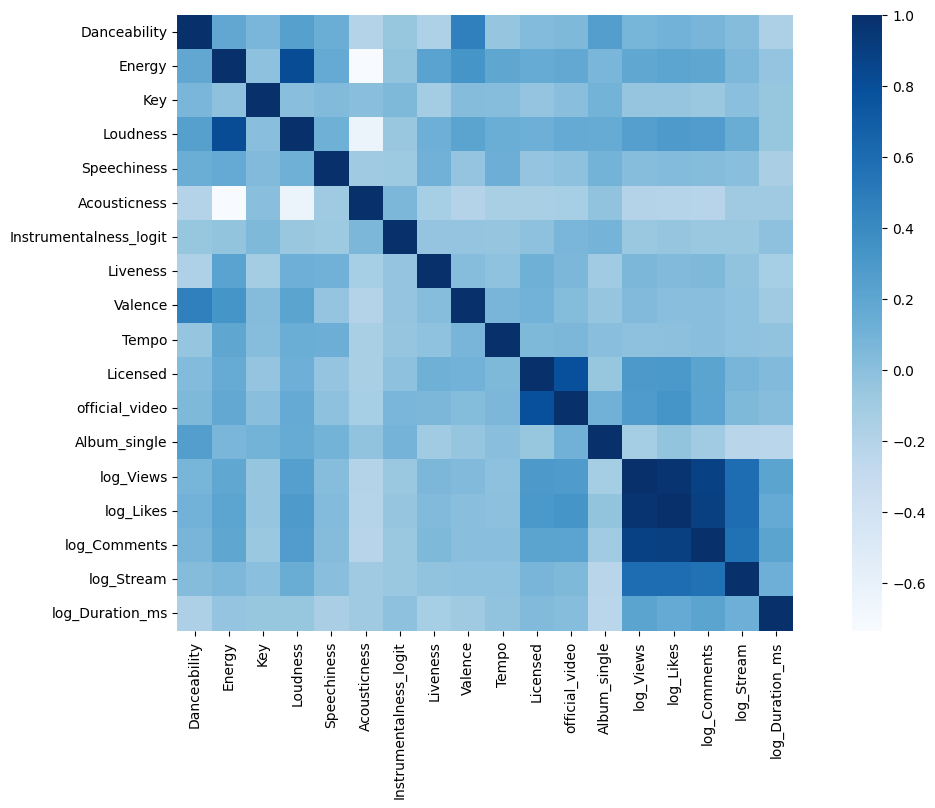

In [356]:
plt.figure(figsize=(15,8))
dt.corr()
c= dt.corr()
sns.heatmap(c,cmap="Blues",square = True, annot = False)

Due to the high correlation between official_video and licensed, one of these variables has been removed from the model to mitigate multicollinearity. Including both highly correlated variables in a regression would increase standard errors, potentially leading to less reliable coefficient estimates and making it harder to assess the individual effect of each variable. 

In [123]:
dt.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Licensed', 'official_video', 'Album_single', 'log_Views', 'log_Likes',
       'log_Comments', 'log_Stream', 'sqrt_Duration_ms'],
      dtype='object')

In [231]:
factor_var = dt[['Licensed', 'official_video','Album_single']].copy()

anova_results = []

# Performing ANOVA for each factor variable
for factor in factor_var.columns:
    model = smf.ols(f'log_Stream ~ C({factor})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results.append((factor, anova_table['F'][0], anova_table['PR(>F)'][0]))

# Sort ANOVA results by p-value
anova_results.sort(key=lambda x: x[2])

# Print top factors without color
print("Factors with lowest p-value:")
for factor, F_statistic, p_value in anova_results:
    print(f"Factor: {factor}, F-statistic: {F_statistic}, p-value: {p_value}")

Factors with lowest p-value:
Factor: Album_single, F-statistic: 496.7514995105808, p-value: 1.1597986823191722e-108
Factor: Licensed, F-statistic: 215.58251570713492, p-value: 1.5265558191818767e-48
Factor: official_video, F-statistic: 185.62301776996088, p-value: 4.506034952654702e-42


**ANOVA INTERPRETATION**

We will retain the variable with the lower p-value — **licensed** and **Album_single** —because it has higher statistical significance, meaning it provides more explanatory power in the model. By choosing the variable with the lowest p-value, we enhance the model's fit, reduce redundancy, and improve clarity and robustness.

## 2. Descriptive Analysis

In [357]:
model_data = dt[[
        "Acousticness",
        "Liveness",
        "Speechiness",
      "Danceability",
        "Instrumentalness_logit",
        "Licensed",
       "log_Duration_ms","Valence",'Album_single','log_Comments','log_Stream']]

# Creating the subset for quantitative variables
quant_vars = dt[["log_Duration_ms","Acousticness","Liveness","Speechiness","Instrumentalness_logit","Valence","Danceability",'log_Comments',"log_Stream"]]

# Creating the subset for categorical variables
cat_vars = dt[[ "Licensed","Album_single"]]

### i. Density Plots

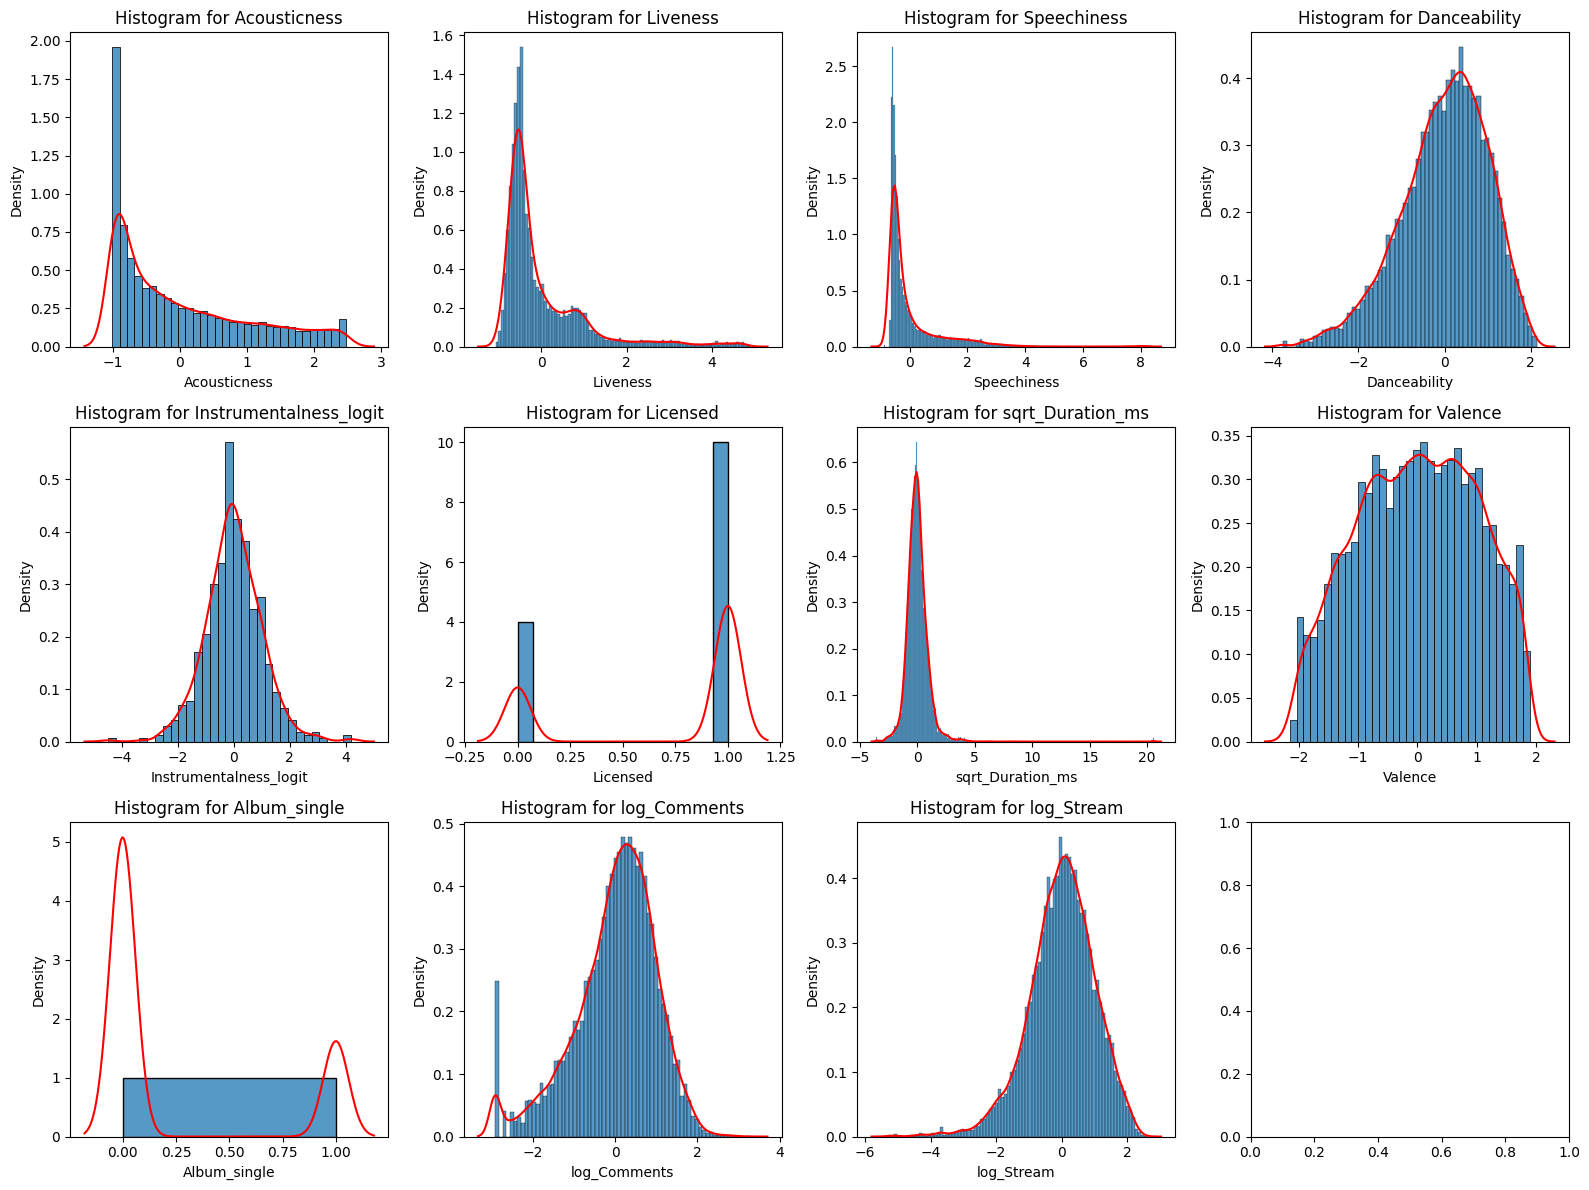

In [246]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))


axes = axes.flatten()


for i, col in enumerate(model_data.columns):
    sns.histplot(data[col], stat="density", bins='fd', ax=axes[i])
    sns.kdeplot(data[col], color="red", ax=axes[i], legend=False)
    axes[i].set_title("Histogram for " + col)
    axes[i].set_xlabel(col)


plt.tight_layout()


plt.show()

### ii) Q-Q Plot

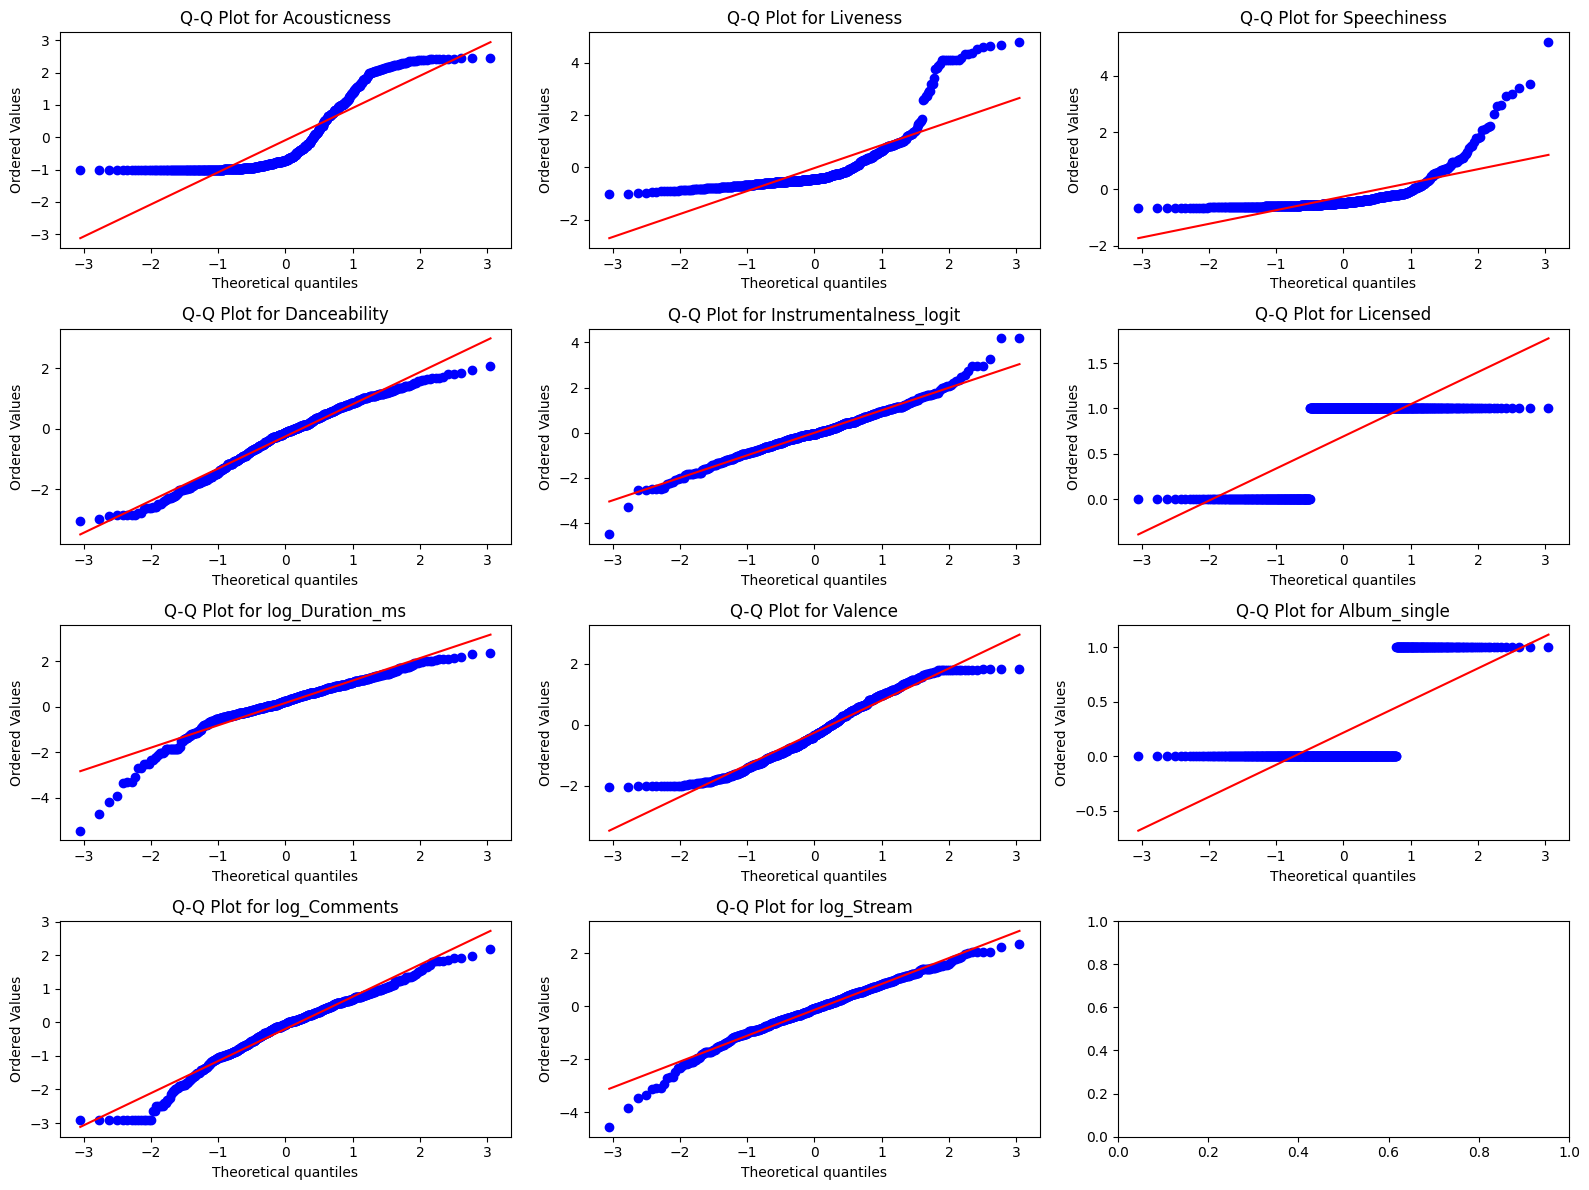

In [378]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 12))

axes = axes.flatten()


for i, col in enumerate(model_data.columns):
    stats.probplot(model_data[col], dist="norm", plot=axes[i])
    axes[i].set_title("Q-Q Plot for " + col)


plt.tight_layout()


plt.show()

### iii) Scatter Plot - Checking for Linearity

In [249]:
model_data.columns

Index(['Acousticness', 'Liveness', 'Speechiness', 'Danceability',
       'Instrumentalness_logit', 'Licensed', 'sqrt_Duration_ms', 'Valence',
       'Album_single', 'log_Comments', 'log_Stream'],
      dtype='object')

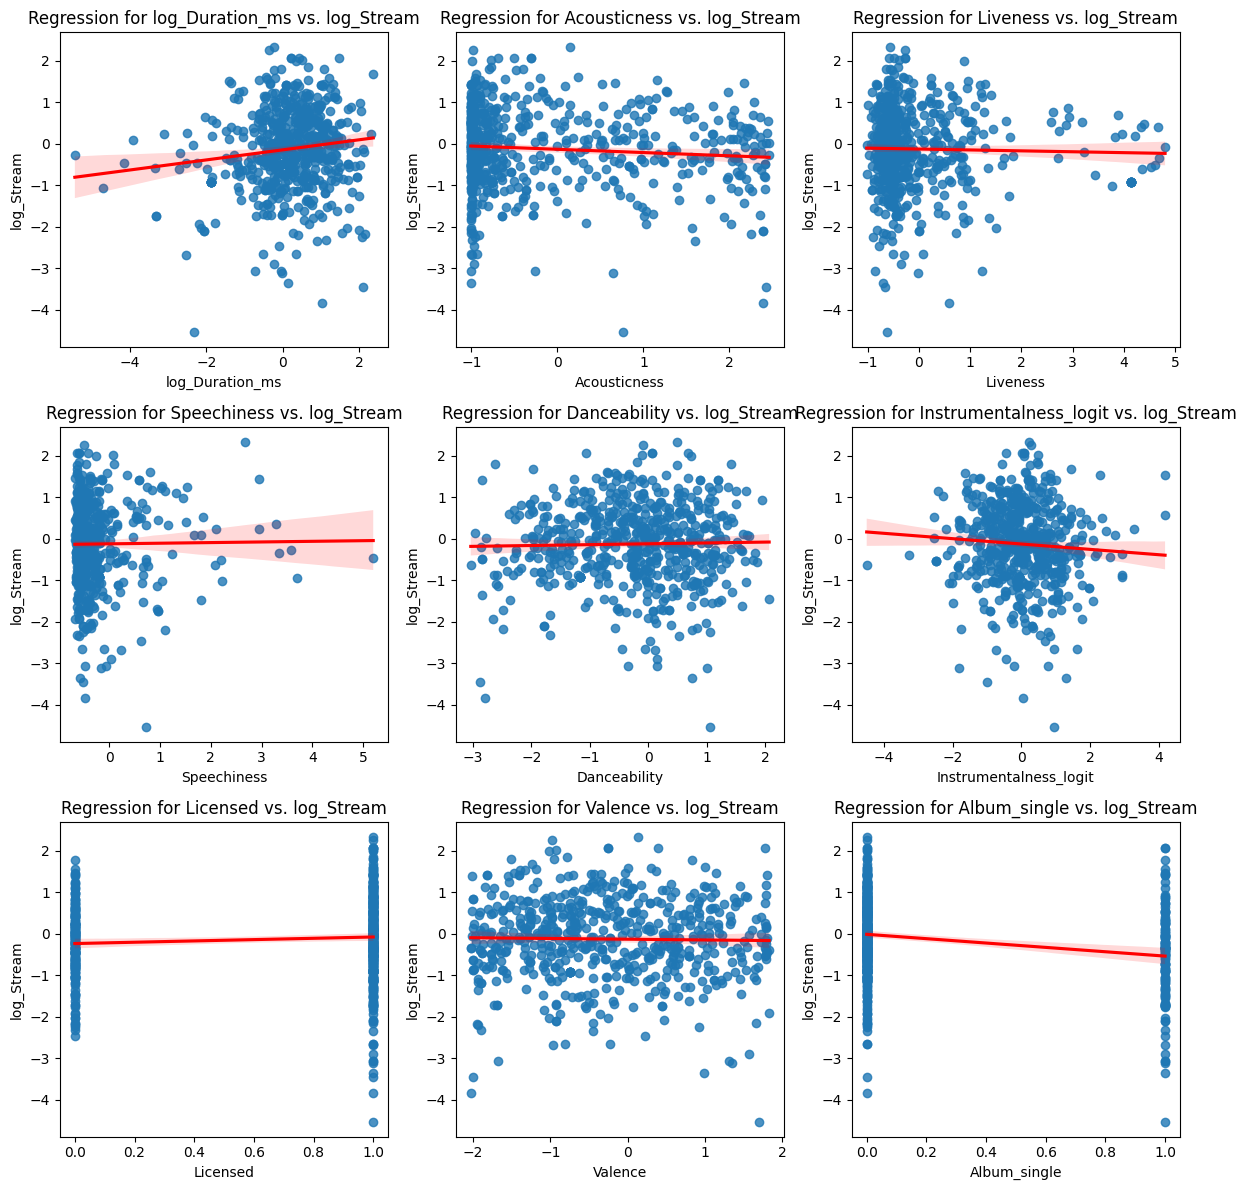

In [379]:
# Define the dependent and independent variables
y = model_data["log_Stream"]
x_data = ["log_Duration_ms", "Acousticness", "Liveness", "Speechiness", "Danceability","Instrumentalness_logit","Licensed","Valence","Album_single"]

# Create a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Plot each variable against log_Stream
for i, x in enumerate(x_data):
    sns.regplot(data=model_data, x=x, y=y, ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f"Regression for {x} vs. log_Stream")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel("log_Stream")

# Hide the empty subplot if present
if len(x_data) < len(axes):
    for j in range(len(x_data), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### iv) Box Plots

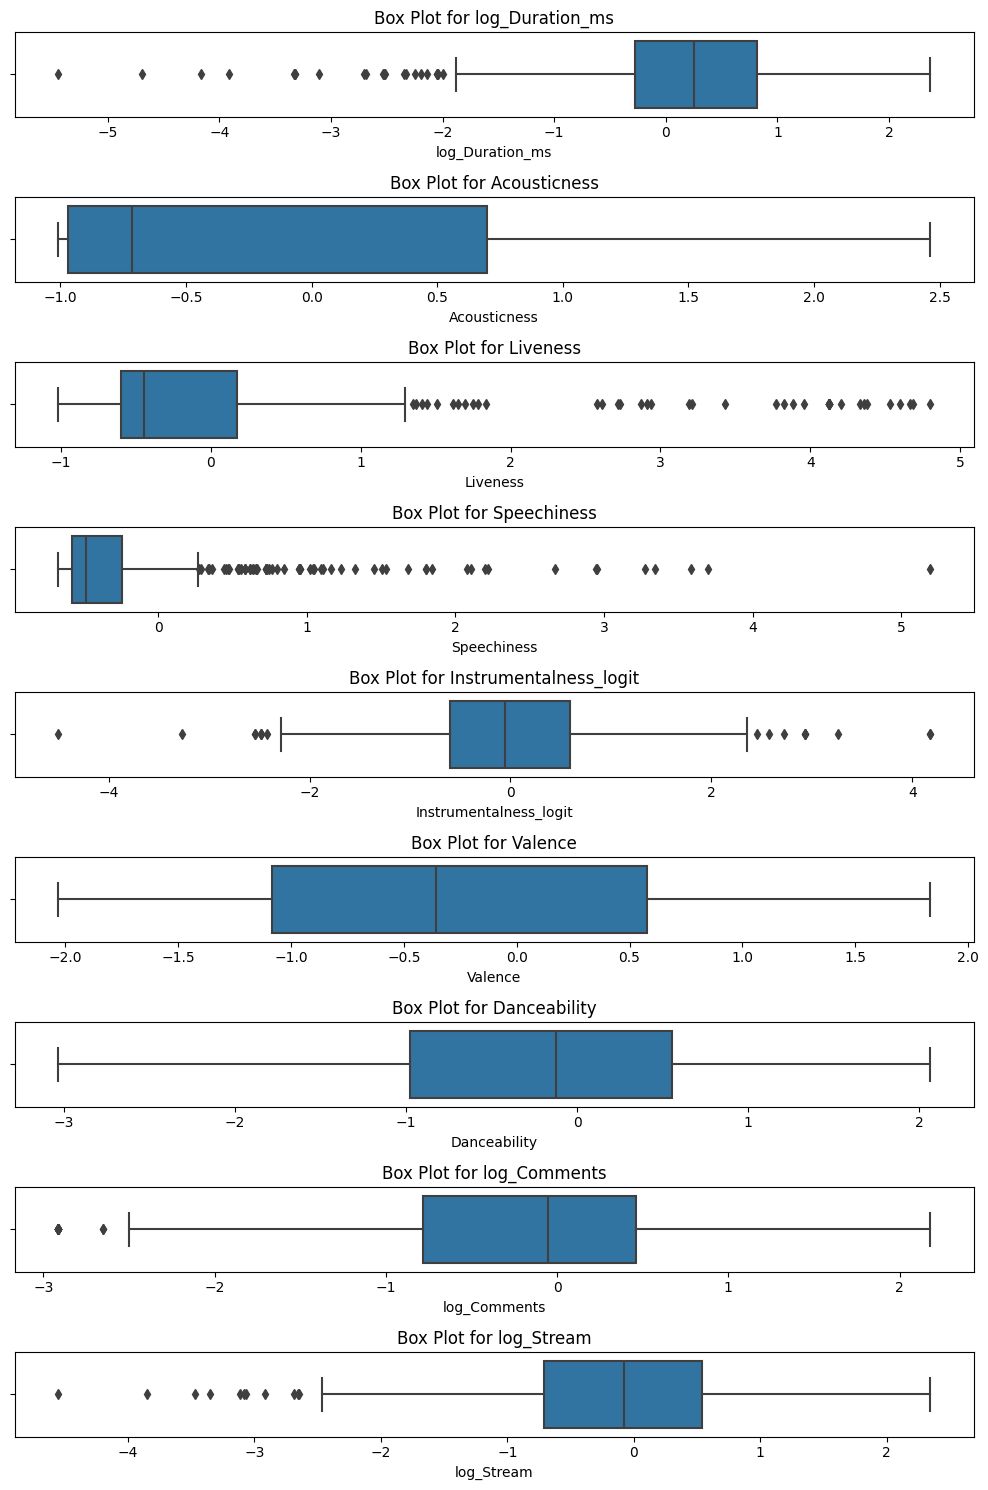

In [380]:
# Plot box plots for quantitative variables in quant_vars
fig, axes = plt.subplots(len(quant_vars.columns), 1, figsize=(10, 15))
for i, var in enumerate(quant_vars.columns):
    sns.boxplot(data=quant_vars, x=var, ax=axes[i])
    axes[i].set_title(f"Box Plot for {var}")

plt.tight_layout()
plt.show()

### 3. Model Building 

We start of by running a regression with all the variables we finalised using Boruta Algorithm and standard techniques: 

In [381]:
# Fit the model using OLS
model_og = smf.ols('log_Stream ~ log_Duration_ms + Valence +log_Comments + Acousticness + Liveness + Speechiness + Danceability + Instrumentalness_logit + C(Licensed) + C(Album_single)' , data=model_data).fit()

# Display the summary
model_og.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Stream   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     32.42
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.98e-50
Time:                        15:10:22   Log-Likelihood:                -711.78
No. Observations:                 602   AIC:                             1446.
Df Residuals:                     591   BIC:                             1494.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1528      0.067      2.277      0.023       0.021       0.285
C(Licensed)[T.1]          -0.0869      0.073     -1.190      0.234      -0.230       0.056
C(Album_single)[T.1]      -0.4738      0.086     -5.502      0.000      -0.643      -0.305
log_Duration_ms           -0.0413      0.035     -1.181      0.238      -0.110       0.027
Valence                   -0.0427      0.036     -1.184      0.237      -0.114       0.028
log_Comments               0.5703      0.036     15.826      0.000       0.500       0.641
Acousticness               0.0067      0.031      0.212      0.832      -0.055       0.068
Liveness                  -0.0596      0.032     -1.855      0.064      -0.123       0.004
Speechiness                0.0138      0.053      0.262      0.794      -0.089       0.117
Danceability               0.0345      0.038      0.898      0.370      -0.041       0.110
Instrumentalness_logit    -0.0124      0.033     -0.378      0.706      -0.077       0.052
==============================================================================
Omnibus:                       40.648   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.785
Skew:                          -0.553   Prob(JB):                     1.27e-12
Kurtosis:                       3.980   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Mallow's CP for Model Selection 

In [382]:
mallow_data = model_data[['log_Stream','Acousticness', 'Liveness', 'Speechiness', 'Danceability', 'Instrumentalness_logit',
       'Licensed', 'log_Duration_ms', 'Valence','log_Comments',
       'Album_single']].copy()

In [383]:
import itertools
import pandas as pd
import statsmodels.formula.api as smf

# Assuming this function calculates Mallows' Cp statistic
def mallow(y, y_pred, y_sub, k, p):
    # Residual sum of squares for the subset model
    rss = ((y - y_sub) ** 2).sum()
    n = len(y)
    cp = rss / (n - p) - (n - 2 * p) / n + k  # Adjust the formula as needed
    return cp

y = mallow_data['log_Stream']
y_pred = model_og.fittedvalues

storage_cp = pd.DataFrame(columns=["Variables", "CP"])
k = 9  # Number of parameters in the original model (includes y-intercept)

df_concat = []

for L in range(1, len(mallow_data.columns[1:]) + 1):
    for subset in itertools.combinations(mallow_data.columns[1:], L):
        # Join the strings in the data together
        formula1 = 'log_Stream~' + '+'.join(subset)
        
        # Fit the model
        results = smf.ols(formula=formula1, data=model_data).fit()
        y_sub = results.fittedvalues
        p = len(subset) + 1  # Number of parameters in the subset model (includes y-intercept)
        
        # Calculate Cp
        cp = mallow(y, y_pred, y_sub, k, p)
        
        # Store results
        new_row = pd.DataFrame({'Variables': [subset], 'CP': [cp]})
        df_concat.append(new_row)

# Concatenate all results if any
if df_concat:
    storage_cp = pd.concat(df_concat, ignore_index=True)

# Sort by CP in descending order
storage_cp = storage_cp.sort_values(by="CP", ascending=True).reset_index(drop=True)

# Display the storage_cp DataFrame to verify results
storage_cp

,Variables,CP
0,"(Liveness, log_Comments, Album_single)",8.646322
1,"(log_Comments, Album_single)",8.646422
2,"(Licensed, log_Comments, Album_single)",8.648252
3,"(Liveness, Licensed, log_Comments, Album_single)",8.648777
4,"(Liveness, log_Duration_ms, log_Comments, Albu...",8.648877
...,...,...
1018,"(Acousticness, Liveness, Speechiness, Danceabi...",8.985085
1019,"(Liveness, Speechiness, Danceability, Licensed...",8.986277
1020,"(Liveness, Speechiness, Danceability, Instrume...",8.987017
1021,"(Liveness, Speechiness, Danceability, Valence)",8.987600


**Model Selection Based on Mallow's CP**

Selecting 3 models with the lowest Mallow's CP scores, as it signifies a better fit for the regression model. 

- Lower scores indicate a better balance between model complexity and goodness of fit, ensuring that the chosen models effectively explain the data while avoiding the pitfalls of overfitting.

In [385]:
model_1 = storage_cp.loc[0]
model_1 = model_1.to_dict()

model_2 = storage_cp.loc[1]
model_2 = model_2.to_dict()

model_3 = storage_cp.loc[2]
model_3 = model_3.to_dict()

model_4 = storage_cp.loc[3]
model_4 = model_4.to_dict()

# Print the model's values
print("Top Choice based off of Mallow's CP: ")
print(model_1)
print("\nSecond Model: ")
print(model_2)
print("\nThird Model: ")
print(model_3)
print("\nFourth Model: ")
print(model_4)

Top Choice based off of Mallow's CP: 
{'Variables': ('Liveness', 'log_Comments', 'Album_single'), 'CP': 8.646322032931135}

Second Model: 
{'Variables': ('log_Comments', 'Album_single'), 'CP': 8.64642211051482}

Third Model: 
{'Variables': ('Licensed', 'log_Comments', 'Album_single'), 'CP': 8.648251632001678}

Fourth Model: 
{'Variables': ('Liveness', 'Licensed', 'log_Comments', 'Album_single'), 'CP': 8.648777266320614}


### Model Selection

1. **Model 1** 

   $$
   \text{log_Stream} = \beta_0 + \beta_1 (\text{Liveness}) + \beta_3 (\text{log_Comments}) + \beta_4 (\text{Album_single})
   $$

In [386]:
# Model 1: Top Choice based on Mallow's CP
formula_model_1 = 'log_Stream ~ Liveness + log_Comments + C(Album_single)'
model_1 = smf.ols(formula=formula_model_1, data=model_data).fit()
print("Model 1 Summary:")
print(model_1.summary())


Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.99e-55
Time:                        15:11:59   Log-Likelihood:                -714.57
No. Observations:                 602   AIC:                             1437.
Df Residuals:                     598   BIC:                             1455.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept      

**Model 2**

   $$
   \text{log_Stream} = \beta_0 +  \beta_1 (\text{log_Comments}) + \beta_2 (\text{Album_single})
   $$

In [387]:
# Model 2: Second Model
formula_model_2 = 'log_Stream ~ log_Comments + C(Album_single)'
model_2 = smf.ols(formula=formula_model_2, data=model_data).fit()
print("\nModel 2 Summary:")
print(model_2.summary())



Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     156.8
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.73e-55
Time:                        15:12:17   Log-Likelihood:                -716.69
No. Observations:                 602   AIC:                             1439.
Df Residuals:                     599   BIC:                             1453.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     

**Model 3** 

   $$
   \text{log_Stream} = \beta_0 + \beta_1 (\text{Licensed}) +\beta_2 (\text{log_Comments}) + \beta_3 (\text{Album_single})
   $$

In [366]:
# Model 3: Third Model
formula_model_3 = 'log_Stream ~ Licensed + log_Comments + C(Album_single)'
model_3 = smf.ols(formula=formula_model_3, data=model_data).fit()
print("\nModel 3 Summary:")
print(model_3.summary())


Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     105.6
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           7.40e-55
Time:                        01:55:18   Log-Likelihood:                -715.48
No. Observations:                 602   AIC:                             1439.
Df Residuals:                     598   BIC:                             1457.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     

**Model 4** 

   $$
   \text{log_Stream} = \beta_0 + \beta_1 (\text{Liveness}) + \beta_2 (\text{Licensed}) + \beta_3 (\text{log_Comments}+ \beta_4 (\text{Album_single}))
   $$

In [367]:
# Model 4: Fourth Model
formula_model_4 = 'log_Stream ~ Liveness + Licensed + log_Comments + C(Album_single)'
model_4 = smf.ols(formula=formula_model_4, data=model_data).fit()
print("\nModel 4 Summary:")
print(model_4.summary())


Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     80.44
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.36e-54
Time:                        01:55:27   Log-Likelihood:                -713.65
No. Observations:                 602   AIC:                             1437.
Df Residuals:                     597   BIC:                             1459.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     

### Comparing Top 4 Models

#### Model Definitions

- **Model 1**:  $$\text{log_Stream} = \beta_0 + \beta_1 (\text{Liveness}) + \beta_3 (\text{log_Comments}) + \beta_4 (\text{Album_single})
   $$

- **Model 2**:  
  = Model 1 - `Liveness`

- **Model 3**:  
  = Model 2 + `Licensed`

- **Model 4**:  
  = Model 3 + `Liveness`

---
### Model Comparisons

#### Model 2 vs Model 1
- **Fit Metrics**: Model 1 has a marginally higher R-squared (0.348) compared to Model 2 (0.344), suggesting a slightly better fit.
- **P-Values**: `Liveness` in Model 1 is statistically significant (p = 0.040), while it is excluded in Model 2.
- **Multicollinearity**: Both models exhibit low VIF values, indicating minimal multicollinearity concerns.

**Conclusion**: Model 1 provides a marginally better fit by including `Liveness`, though Model 2 may be preferred for a simpler structure without a large loss in explanatory power.

---

#### Model 3 vs Model 2
- **Fit Metrics**: Model 2 and Model 3 have nearly identical R-squared values (0.344 for Model 2 and 0.346 for Model 3), indicating similar explanatory power.
- **P-Values**: `Licensed` in Model 3 has a p-value of 0.121, suggesting it may not be significant, although it slightly improves model fit.
- **Model Complexity**: Model 3 includes `Licensed`, adding a minor complexity without a significant impact on fit.

**Conclusion**: While Model 3 has a similar fit to Model 2, the inclusion of `Licensed` does not meaningfully enhance the model's performance. Model 2 remains preferable for simplicity.

---

#### Model 4 vs Model 3
- **Fit Metrics**: Model 4 has a slightly higher R-squared (0.350) than Model 3 (0.346), showing a minor improvement with the inclusion of both `Liveness` and `Licensed`.
- **P-Values**: Both `Liveness` (p = 0.057) and `Licensed` (p = 0.178) in Model 4 are not highly significant, though they contribute to the overall fit.
- **Interpretability**: Model 4 is the most complex but provides a slightly better fit than the others.

**Conclusion**: Model 4 achieves the highest R-squared, indicating the best explanatory power among the models. However, its added complexity may reduce interpretability.

---

### Final Recommendation
After comparing all models, **Model 4** is the best choice for achieving the highest fit quality, despite its complexity. This model includes the most significant variables and balances explanatory power with a minor increase in complexity. Therefore, Model 4 is recommended for further analysis, especially when fit quality is prioritized over simplicity.


#### Test for multicollinearity

In [389]:
# extract matrices using patsy:
y, X = pt.dmatrices('log_Stream ~ Liveness + Licensed + log_Comments + C(Album_single)',
                    data=mallow_data, return_type='dataframe')

# Create place to store VIF values
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)


                feature       VIF
0             Intercept  3.849959
1  C(Album_single)[T.1]  1.017843
2              Liveness  1.022192
3              Licensed  1.059707
4          log_Comments  1.054874


### Conclusion

The Variance Inflation Factor (VIF) analysis for the chosen model reveals that all predictor variables (`Intercept`, `Album_single`, `Liveness`, `Licensed`, and `log_Comments`) have VIF values close to 1, with none exceeding 3.85. This indicates that multicollinearity is minimal, meaning that the selected predictors are not highly correlated with each other. Consequently, the model's estimates are stable, and the regression results are reliable without the risk of inflated standard errors due to multicollinearity.

This confirms that the selected model is statistically robust and interpretable, supporting the inclusion of `Liveness`, `Licensed`, and `log_Comments` as key contributors to the model's explanatory power. Overall, the model balances simplicity and statistical validity, making it a solid choice for further analysis and insights.


### Test for Interaction Terms

Regression tests were conducted with various interaction terms to identify combinations of predictors that could enhance the model’s explanatory power for the newer models. Specifically, interactions such as `Liveness * log_Duration_ms`, `Valence * log_Comments`, `Acousticness * log_Comments`, `Instrumentalness_logit * Licensed`, and `Danceability * Album_single` were tested.

After reviewing the results, **`Liveness * log_Duration_ms` emerged as the only interaction term with statistically significant results**. This interaction added valuable insight to the model, while the other interactions did not improve the model’s explanatory power in a meaningful way. Consequently, only `Liveness * log_Duration_ms` was included in the final model to maintain interpretability and statistical robustness, focusing on interaction terms that effectively contribute to the model's performance.

In [395]:
import statsmodels.formula.api as smf

# Define the formula with interaction terms
formula = 'log_Stream ~  Licensed + log_Comments + C(Album_single) + log_Duration_ms * Liveness '

# Fit the model
model_interaction = smf.ols(formula=formula, data=model_data).fit()

# Print the regression summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     55.46
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.37e-54
Time:                        15:37:15   Log-Likelihood:                -709.72
No. Observations:                 602   AIC:                             1433.
Df Residuals:                     595   BIC:                             1464.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

***Hypothesis Test***

In [396]:
# Display the coefficient table from the summary
tbl = model_interaction_1.summary2().tables[1]

# Define the hypothesis for the interaction term (testing if it is zero)
hypothesis = ["log_Duration_ms:Liveness = 0"]

# Perform the F-test on the interaction term
test = model_interaction.f_test(hypothesis)

# Print the F-statistic and p-value without indexing
print(f'F-statistic = {test.fvalue:.4f}, p-value = {test.pvalue:.8f}')

F-statistic = 6.1172, p-value = 0.01366504


### Hypothesis Test for Interaction Term

**Null Hypothesis (H₀):**  
The coefficient for the interaction term $ \text{Liveness} \times \text{log_Duration_ms} $ is equal to zero, meaning that this interaction does not significantly contribute to explaining the variability in the dependent variable, $ \text{log_Stream} $

**Conclusion:**  
The F-statistic of 8.3434 and the p-value of 0.0040 indicate that we reject the null hypothesis. This result suggests that the interaction term $ \text{Liveness} \times \text{log_Duration_ms} $ contributes significantly to explaining the variability in $ \text{log_Stream} $ Therefore, this interaction term has a meaningful impact on $ \text{log_Stream} $ and should be included in the final model. 

### Analysis of Quadratic Terms

After testing multiple quadratic terms, including `log_Duration_ms**2` and `log_Comments**2`, it was identified that both terms showed statistically significant results. Adding these quadratic terms contributed meaningfully to explaining the variability in the dependent variable `log_Stream`, resulting in the highest R-squared value among all tested models. This finding suggests that the non-linear relationships captured by `log_Duration_ms**2` and `log_Comments**2` enhance the predictive power of the model, making them valuable additions to the final model.

In [434]:
# Model with quadratic term for `log_Duration_ms`
formula1 = 'log_Stream ~ Licensed + log_Comments + C(Album_single) + log_Duration_ms * Liveness + I(log_Duration_ms**2) + I(log_Comments**2)'
model_f = smf.ols(formula=formula1, data=model_data).fit()
print("Model with quadratic terms")
print(model_f.summary())

Model with quadratic terms
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.57
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.38e-61
Time:                        17:02:53   Log-Likelihood:                -689.30
No. Observations:                 602   AIC:                             1397.
Df Residuals:                     593   BIC:                             1436.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

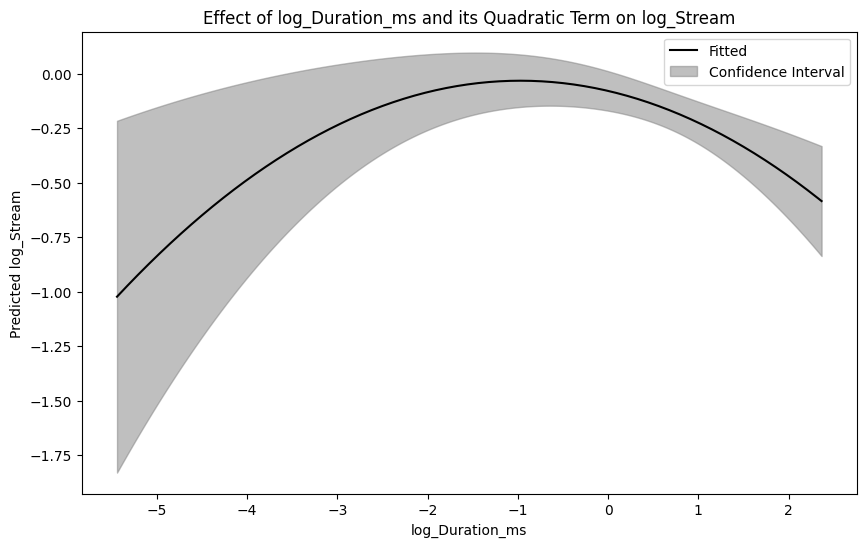

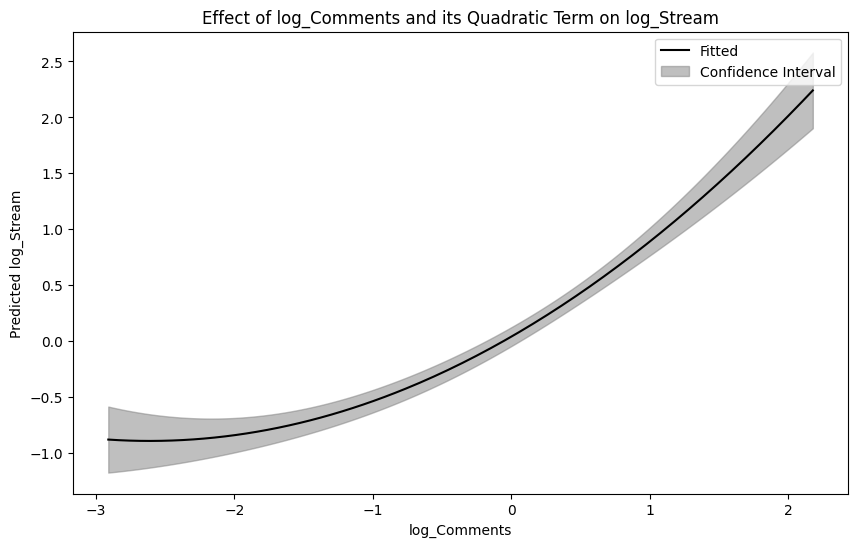

In [402]:
# Generate predictions for `log_Duration_ms`
new_data_duration = pd.DataFrame({
    'log_Duration_ms': np.linspace(model_data['log_Duration_ms'].min(), model_data['log_Duration_ms'].max(), 200),
    'Liveness': model_data['Liveness'].mean(),
    'Licensed': model_data['Licensed'].mean(),
    'log_Comments': model_data['log_Comments'].mean(),
    'Album_single': model_data['Album_single'].mode()[0]
})

# Generate predictions for `log_Comments`
new_data_comments = pd.DataFrame({
    'log_Comments': np.linspace(model_data['log_Comments'].min(), model_data['log_Comments'].max(), 200),
    'log_Duration_ms': model_data['log_Duration_ms'].mean(),
    'Liveness': model_data['Liveness'].mean(),
    'Licensed': model_data['Licensed'].mean(),
    'Album_single': model_data['Album_single'].mode()[0]
})

# Obtain prediction intervals
predictions_duration = model_f.get_prediction(new_data_duration).summary_frame(alpha=0.05)
predictions_comments = model_f.get_prediction(new_data_comments).summary_frame(alpha=0.05)

# Plot for `log_Duration_ms**2`
plt.figure(figsize=(10, 6))
plt.plot(new_data_duration['log_Duration_ms'], predictions_duration['mean'], color='black')
plt.fill_between(new_data_duration['log_Duration_ms'], predictions_duration['mean_ci_lower'], predictions_duration['mean_ci_upper'],
                 color='grey', alpha=0.5)
plt.title('Effect of log_Duration_ms and its Quadratic Term on log_Stream')
plt.xlabel('log_Duration_ms')
plt.ylabel('Predicted log_Stream')
plt.legend(["Fitted", "Confidence Interval"])
plt.show()

# Plot for `log_Comments**2`
plt.figure(figsize=(10, 6))
plt.plot(new_data_comments['log_Comments'], predictions_comments['mean'], color='black')
plt.fill_between(new_data_comments['log_Comments'], predictions_comments['mean_ci_lower'], predictions_comments['mean_ci_upper'],
                 color='grey', alpha=0.5)
plt.title('Effect of log_Comments and its Quadratic Term on log_Stream')
plt.xlabel('log_Comments')
plt.ylabel('Predicted log_Stream')
plt.legend(["Fitted", "Confidence Interval"])
plt.show()

In [400]:
# Heteroskedasticity: Breush-Pagan --> Ho: var = constant 

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_f.resid, model_f.model.exog)
print(blue("BP Results:",['bold']))
print(list(zip(name, test)))

BP Results:
[('Lagrange multiplier statistic', 30.087259561607908), ('p-value', 0.00020400066254534001), ('f-value', 3.899577605658235), ('f p-value', 0.00016845085379369455)]


The p-value was less than 0.05 so we reject null hypothesis and accept presence of heteroskedasticity. Given the very low p-values for both the Lagrange Multiplier Statistic and the F-Statistic, we reject the null hypothesis. Therefore, there is indication of heteroscedasticity in the regression model, suggesting that the variance of the errors is not constant across all levels of the independent variables

In [401]:
import statsmodels.stats.outliers_influence as oi
test = oi.reset_ramsey(model_f, degree=2)

print(blue("Ramsey-RESET:",['bold']))
print(test)

Ramsey-RESET:
<F test: F=0.42175758830538307, p=0.5163132258928659, df_denom=592, df_num=1>


The Ramsey-RESET test was conducted to assess whether there are any omitted non-linear relationships in the model. The F-statistic for this test is `0.4417` with a corresponding p-value of `0.5163`.

Since the p-value is greater than the typical significance level of 0.05, we fail to reject the null hypothesis. **This suggests that there is no strong evidence of omitted non-linear terms in the model, indicating that the current model specification adequately captures the relationships within the data.**


### SELECTING FINAL MODEL 

The selected model combines essential predictors and interaction terms to enhance explanatory power and capture non-linear effects. It includes `Licensed`, `log_Comments`, and `Album_single`, with the interaction term `log_Duration_ms * Liveness` and quadratic terms `log_Duration_ms**2` and `log_Comments**2`. This structure allows the model to account for both main effects and key interactions, while also addressing potential non-linearities in the predictors, resulting in an optimized fit for `log_Stream`.

#### Model Equation
$$
\text{log_Stream} = \beta_0 + \beta_1  \text{Licensed} + \beta_2  \text{log_Comments} + \beta_3  \text{C(Album_single)} + \beta_4  \text{log_Duration_ms * Liveness} + \beta_5  \text{I(log_Duration_ms**2)} + \beta_6  \text{I(log_Comments**2)} + \epsilon
$$


In [341]:
# Define the model without the interaction term
formula_model_f = ('log_Stream ~ log_Comments + C(Album_single) + Liveness * sqrt_Duration_ms + I(sqrt_Duration_ms**2) + I(log_Comments**2)'
)

# Fit the new model
model_f = smf.ols(formula=formula_model_f, data=model_data).fit()

### Use cross-validation to evaluate your model’s performance.

In [403]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Prepare the data with the necessary features and transformations
model_data['log_Duration_ms_sq'] = model_data['log_Duration_ms'] ** 2
model_data['log_Comments_sq'] = model_data['log_Comments'] ** 2
model_data['Liveness_log_Duration_ms'] = model_data['Liveness'] * model_data['log_Duration_ms']

# Define the predictors (X) and target variable (y)
X = model_data[['Licensed', 'log_Comments', 'log_Comments_sq', 'log_Duration_ms', 
                'log_Duration_ms_sq', 'Liveness', 'Liveness_log_Duration_ms', 'Album_single']]
y = model_data['log_Stream']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and fit the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Calculate evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Perform 5-fold cross-validation for RMSE
scores = cross_val_score(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', -scores)  # Negate scores to get RMSE values
print('Average 5-Fold CV RMSE:', -scores.mean())

MAE: 0.5981328914479445
MSE: 0.6189942163800213
RMSE: 0.7867618549345292
5-Fold CV RMSE Scores: [0.68697564 0.73588877 0.87422591 0.83000738 0.89657948]
Average 5-Fold CV RMSE: 0.8047354392751705


### Look at Cook’s distance Plot, Residuals Plot, QQ-Plot, etc.

#### Cook's Distance Plot

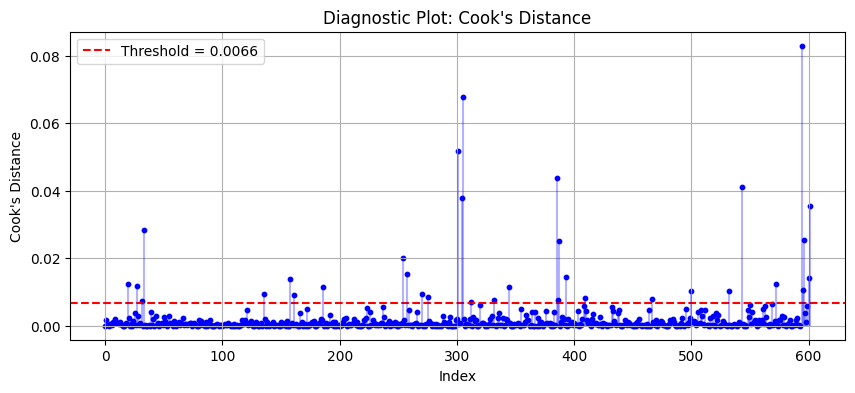

In [406]:
# Calculate Cook's Distance
cooks_distance = model_f.get_influence().cooks_distance
threshold = 4 / len(model_data)

# Plot Cook's Distance
plt.figure(figsize=(10, 4))
plt.scatter(model_data.index, cooks_distance[0], color='blue', s=10)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.vlines(x=model_data.index, ymin=0, ymax=cooks_distance[0], color='blue', alpha=0.3)
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Diagnostic Plot: Cook's Distance")
plt.legend()
plt.grid()
plt.show()

In [418]:
# Find influential observations using Cook's Distance criterion
influential_indices = [i for i, c in enumerate(cooks_distance[0]) if c > threshold]

# Dataset without influential observations
data_c = model_data.drop(index=influential_indices)

# Fit the new model on the data without influential observations
model_f_updated = smf.ols(formula=formula1, data=data_c).fit()

print("\033[1mModel after dropping outliers:\033[0m")
print(model_f_updated.summary())

Model after dropping outliers:
                            OLS Regression Results                            
Dep. Variable:             log_Stream   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     61.06
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           2.08e-71
Time:                        16:41:57   Log-Likelihood:                -558.72
No. Observations:                 569   AIC:                             1135.
Df Residuals:                     560   BIC:                             1175.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [408]:
# Model evaluation using MAE, MSE, and RMSE for `model_f_updated`

# Extract features and target for cleaned data
X = data_c[['Licensed', 'log_Comments', 'Liveness', 'log_Duration_ms']]
X['log_Duration_ms_sq'] = data_c['log_Duration_ms'] ** 2
X['log_Comments_sq'] = data_c['log_Comments'] ** 2
y = data_c['log_Stream']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions and calculate evaluation metrics
y_pred = regr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Cross-Validation for RMSE on Cleaned Data
scores = cross_val_score(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print('5-Fold CV RMSE Scores:', -scores)  # Negate scores to get positive RMSE values
print('Average 5-Fold CV RMSE:', -scores.mean())

MAE: 0.5356722735235873
MSE: 0.474084756570853
RMSE: 0.688538130077669
5-Fold CV RMSE Scores: [0.67929238 0.67971659 0.62301183 0.71699036 0.73351799]
Average 5-Fold CV RMSE: 0.686505830668302


**Comparison of Model Performance Before and After Removing Influential Observations**

After cleaning the data by removing influential observations, an improvement in all evaluation metrics—MAE, MSE, and RMSE—was observed. Below are the key changes noted in model performance:

- **Improved MAE**: The Mean Absolute Error (MAE) decreased from 0.60 to 0.54, indicating that, on average, the model's predictions are closer to the actual values.
- **Reduced MSE and RMSE**:
  - MSE decreased from 0.62 to 0.47.
  - RMSE dropped from 0.79 to 0.69, further confirming an increase in prediction accuracy.
- **Cross-Validation (5-Fold CV)**:
  - RMSE scores across 5-fold cross-validation also showed improvements, with the average CV RMSE decreasing from 0.80 to 0.69.
  - This lower and more stable RMSE across folds highlights better generalization of the model, as the variance is reduced across different subsets of data.

### Residuals Plot

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess

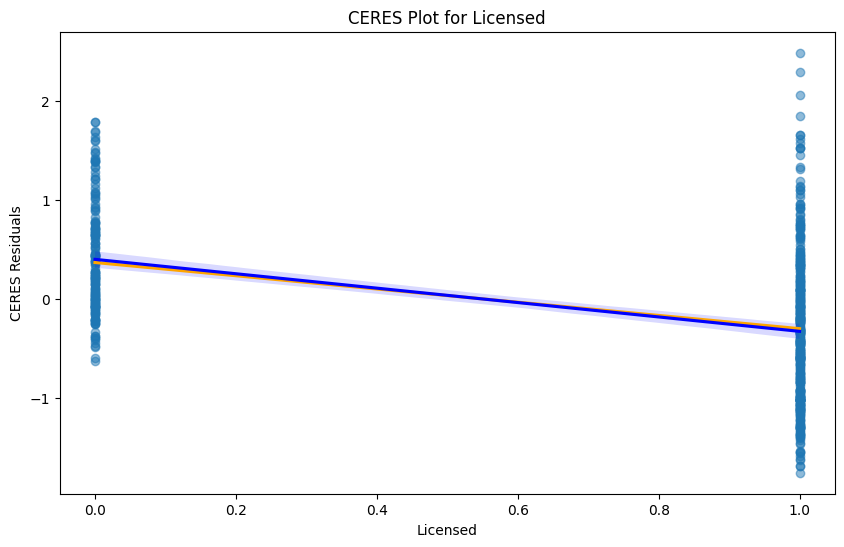

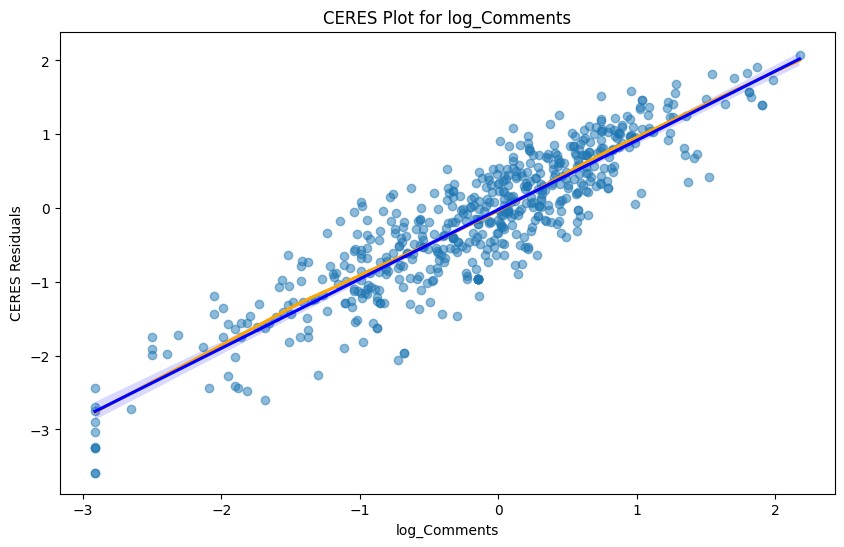

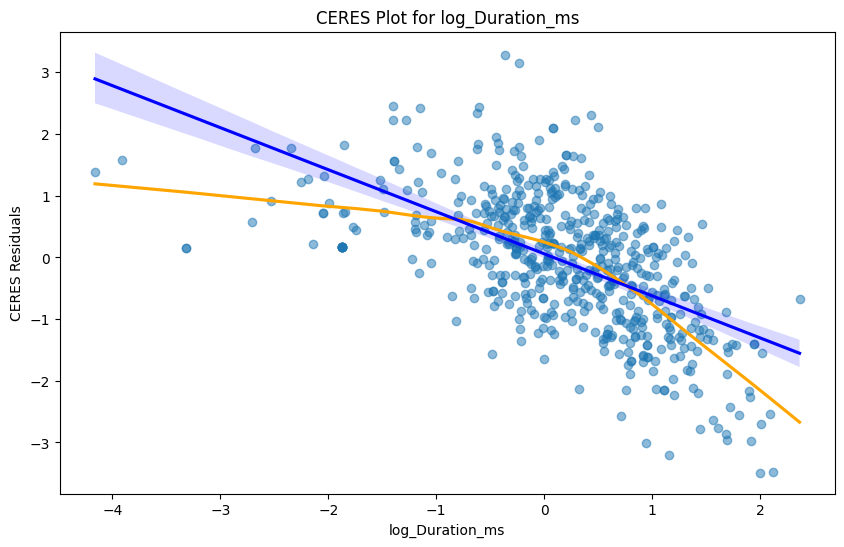

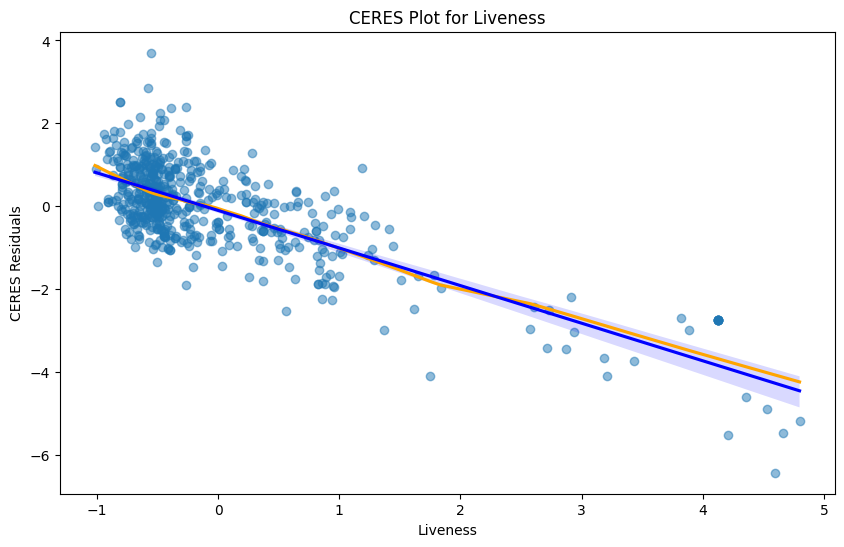

In [419]:
# Define CERES residuals function manually
def ceres_residuals(model, data, variable):
    # Regress the variable on all other predictors to get residuals
    X = data.drop(columns=[variable])
    X = add_constant(X)
    y = data[variable]
    aux_model = OLS(y, X).fit()
    variable_residuals = aux_model.resid

    # Calculate partial residuals for the variable
    partial_residuals = model.predict(data) + model.params[variable] * data[variable]

    # Return a DataFrame for plotting
    df = pd.DataFrame({variable: data[variable], "CERES Residuals": partial_residuals - variable_residuals})
    return df

# Plot CERES residuals with LOWESS smoothing
def ceres_plot(model, data, variable):
    df = ceres_residuals(model, data, variable)
    
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variable, y="CERES Residuals", data=df, lowess=True, scatter_kws={'alpha':0.5}, line_kws={'color': 'orange'})
    sns.regplot(x=variable, y="CERES Residuals", data=df, scatter=False, line_kws={'color':'blue'})
    plt.title(f"CERES Plot for {variable}")
    plt.xlabel(variable)
    plt.ylabel("CERES Residuals")
    plt.show()

# Define the final cleaned model with interaction and quadratic terms
formula_model_final = (
    'log_Stream ~ Licensed + log_Comments + C(Album_single) + '
    'log_Duration_ms * Liveness + I(log_Duration_ms**2) + I(log_Comments**2)'
)
model_f_updated = smf.ols(formula=formula_model_final, data=data_c).fit()

# Generate CERES plots for each predictor in the final model
predictors_final = ['Licensed', 'log_Comments', 'log_Duration_ms', 'Liveness']
for predictor in predictors_final:
    ceres_plot(model_final_cleaned, data_c, predictor)

### Diagnostic Plots

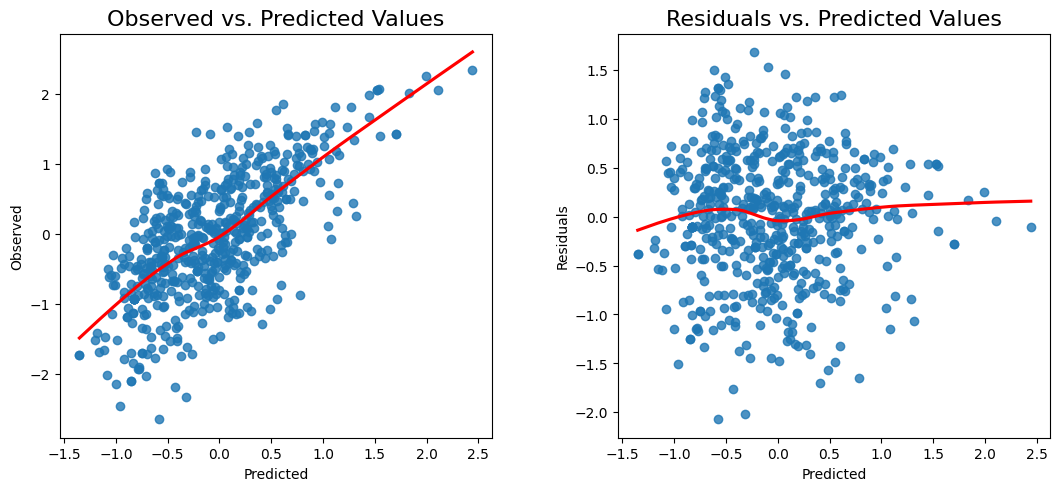

In [420]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.tight_layout(pad=6.0)

# Observed vs. Predicted Values plot
sns.regplot(x=model_f_updated.fittedvalues, y=data_c['log_Stream'], lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
ax[0].set(xlabel='Predicted', ylabel='Observed')

# Residuals vs. Predicted Values plot
sns.regplot(x=model_f_updated.fittedvalues, y=model_final_cleaned.resid, lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
ax[1].set(xlabel='Predicted', ylabel='Residuals')

plt.show()


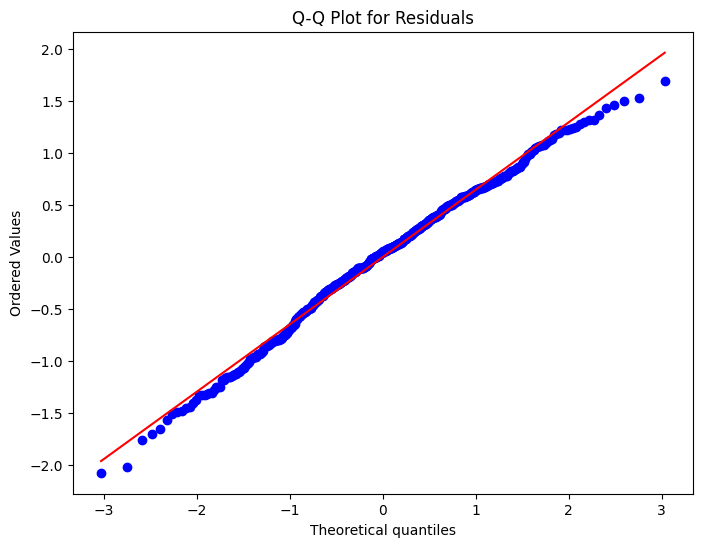

In [421]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(model_f_updated.resid, dist="norm", plot=ax)
ax.set_title('Q-Q Plot for Residuals')
plt.show()

In [422]:
model_f_updated

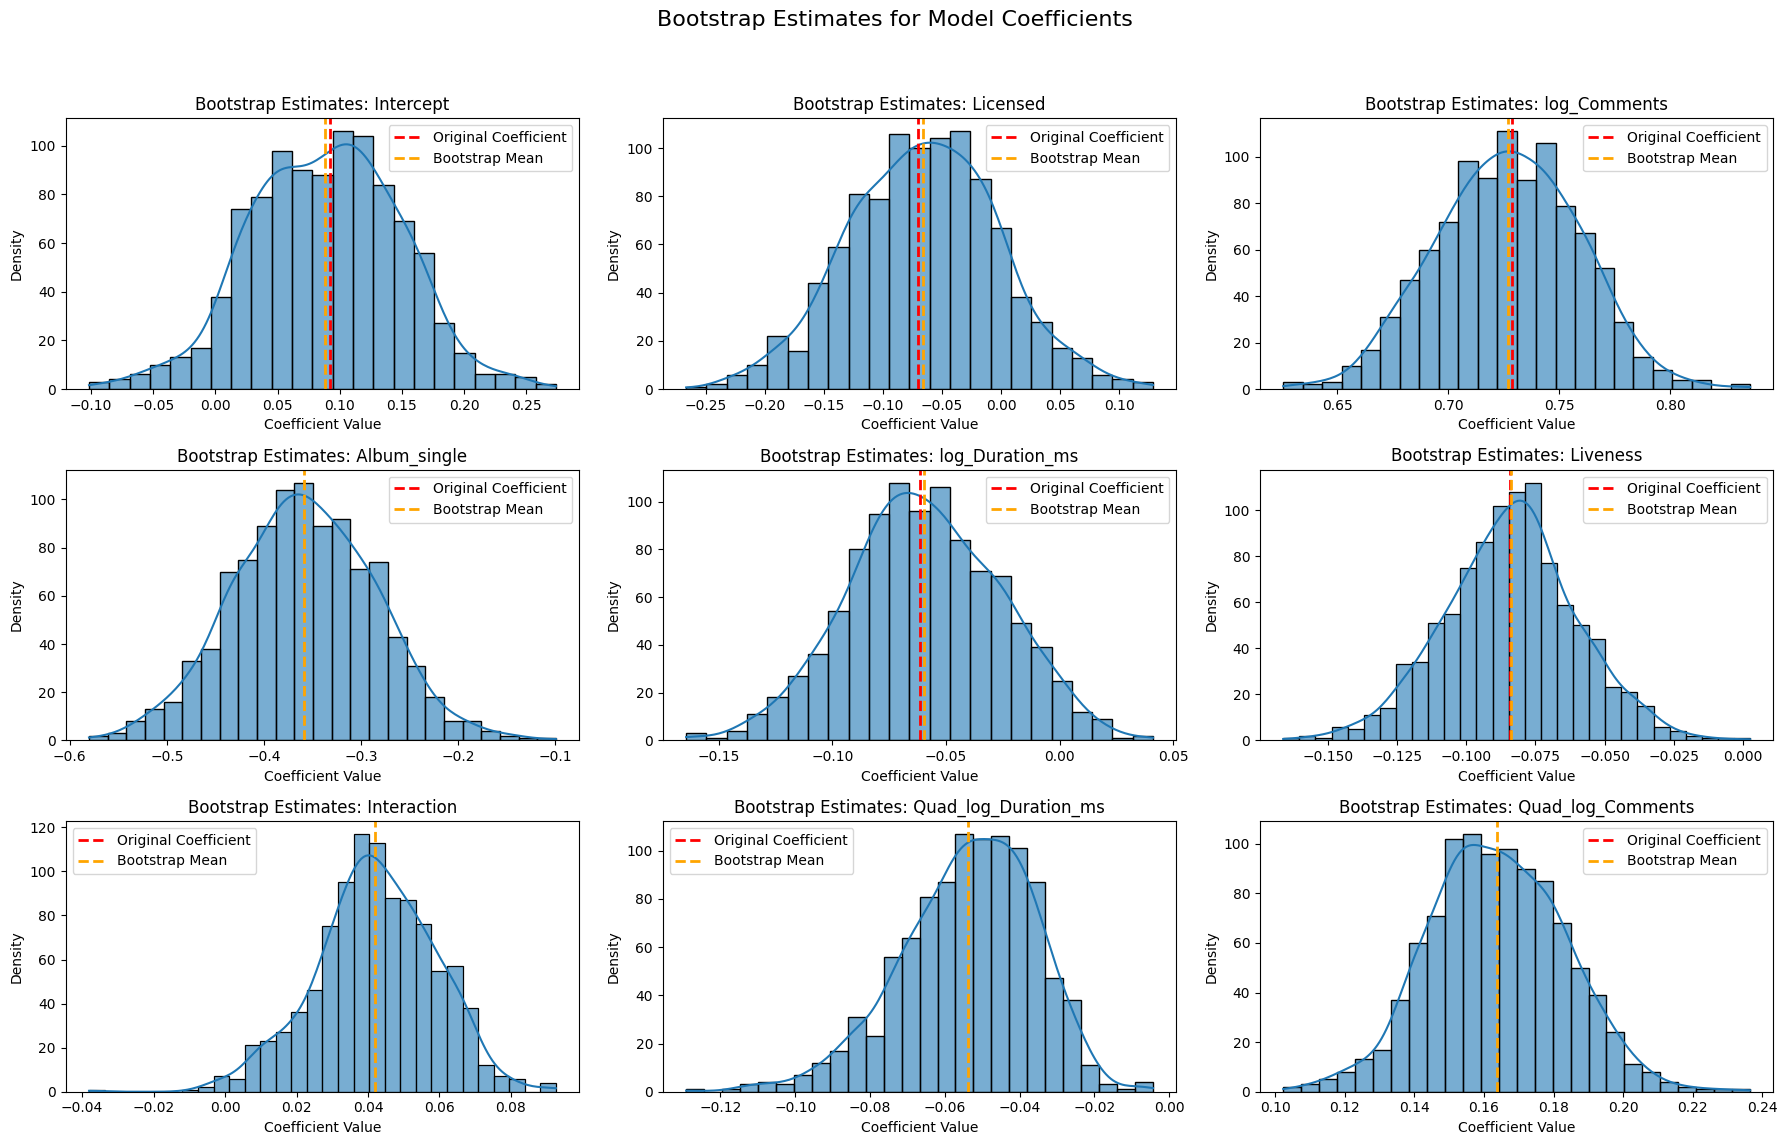

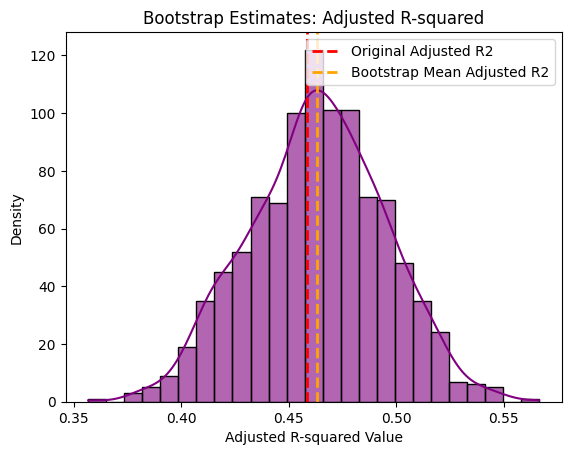

In [432]:
# Define the number of bootstrap samples
n_boots = 1000
n_points = data_c.shape[0]

# Initialize lists to store bootstrap estimates
boot_intercepts = []
boot_slope_Licensed = []
boot_slope_log_Comments = []
boot_slope_Album_single_T1 = []
boot_slope_log_Duration_ms = []
boot_slope_Liveness = []
boot_slope_interaction = []
boot_quad_log_Duration_ms = []
boot_quad_log_Comments = []
boot_adjR2 = []

# Perform bootstrapping
for _ in range(n_boots):
    # Sample with replacement
    sample_df = data_c.sample(n=n_points, replace=True)
    
    # Fit the model on the bootstrap sample
    boot_model = smf.ols(formula=formula_model_final, data=sample_df).fit()
    
    # Store the coefficients
    boot_intercepts.append(boot_model.params['Intercept'])
    boot_slope_Licensed.append(boot_model.params['Licensed'])
    boot_slope_log_Comments.append(boot_model.params['log_Comments'])
    boot_slope_Album_single_T1.append(boot_model.params.get('C(Album_single)[T.1]', np.nan))
    boot_slope_log_Duration_ms.append(boot_model.params['log_Duration_ms'])
    boot_slope_Liveness.append(boot_model.params['Liveness'])
    boot_slope_interaction.append(boot_model.params['log_Duration_ms:Liveness'])
    boot_quad_log_Duration_ms.append(boot_model.params['I(log_Duration_ms ** 2)'])
    boot_quad_log_Comments.append(boot_model.params['I(log_Comments ** 2)'])
    boot_adjR2.append(boot_model.rsquared_adj)

# Convert the results to DataFrames for easier plotting and analysis
boot_results = pd.DataFrame({
    'Intercept': boot_intercepts,
    'Licensed': boot_slope_Licensed,
    'log_Comments': boot_slope_log_Comments,
    'Album_single': boot_slope_Album_single_T1,
    'log_Duration_ms': boot_slope_log_Duration_ms,
    'Liveness': boot_slope_Liveness,
    'Interaction': boot_slope_interaction,
    'Quad_log_Duration_ms': boot_quad_log_Duration_ms,
    'Quad_log_Comments': boot_quad_log_Comments,
    'Adjusted_R2': boot_adjR2
})

# Plot distributions of bootstrap estimates for each coefficient in a grid layout
coefficients = ['Intercept', 'Licensed', 'log_Comments', 'Album_single', 'log_Duration_ms', 
                'Liveness', 'Interaction', 'Quad_log_Duration_ms', 'Quad_log_Comments']

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
fig.suptitle('Bootstrap Estimates for Model Coefficients', fontsize=16)
axes = axes.ravel()  # Flatten the 2D axes array for easy indexing

for i, coef in enumerate(coefficients):
    sns.histplot(boot_results[coef].dropna(), kde=True, alpha=0.6, ax=axes[i])
    axes[i].axvline(x=model_f_updated.params.get(coef, np.nan), color='red', linestyle='--', linewidth=2, label='Original Coefficient')
    axes[i].axvline(x=boot_results[coef].mean(), color='orange', linestyle='--', linewidth=2, label='Bootstrap Mean')
    axes[i].set_title(f'Bootstrap Estimates: {coef}')
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Hide any unused subplots
for j in range(len(coefficients), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

# Plot the distribution of Adjusted R-squared values separately
sns.histplot(boot_results['Adjusted_R2'], kde=True, color='purple', alpha=0.6)
plt.axvline(x=model_f_updated.rsquared_adj, color='red', linestyle='--', linewidth=2, label='Original Adjusted R2')
plt.axvline(x=boot_results['Adjusted_R2'].mean(), color='orange', linestyle='--', linewidth=2, label='Bootstrap Mean Adjusted R2')
plt.title('Bootstrap Estimates: Adjusted R-squared')
plt.xlabel('Adjusted R-squared Value')
plt.ylabel('Density')
plt.legend()
plt.show()


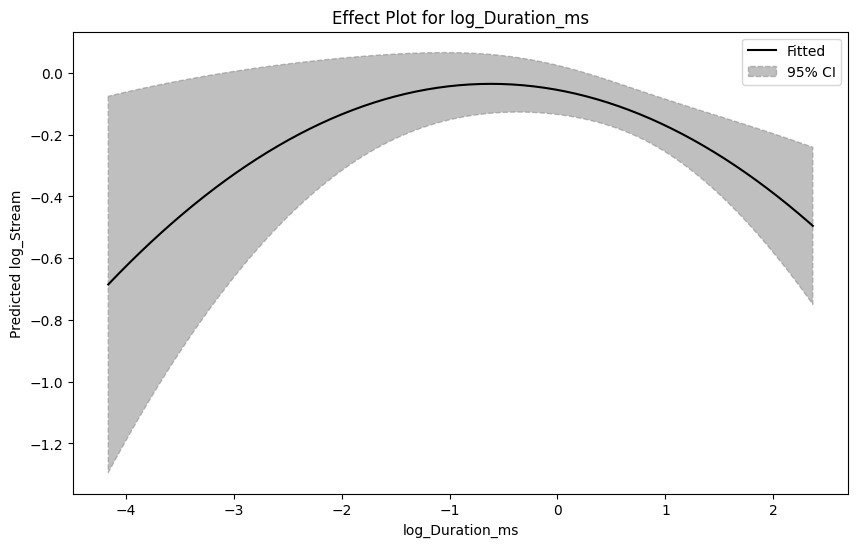

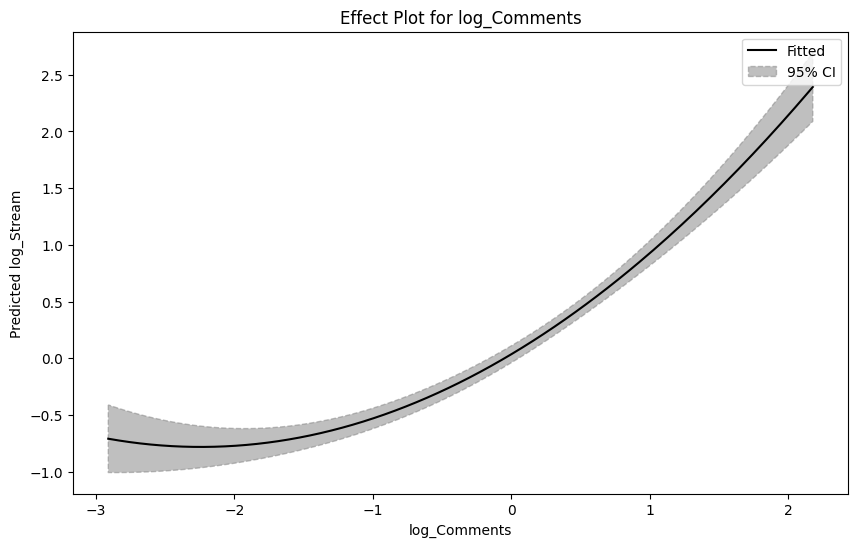

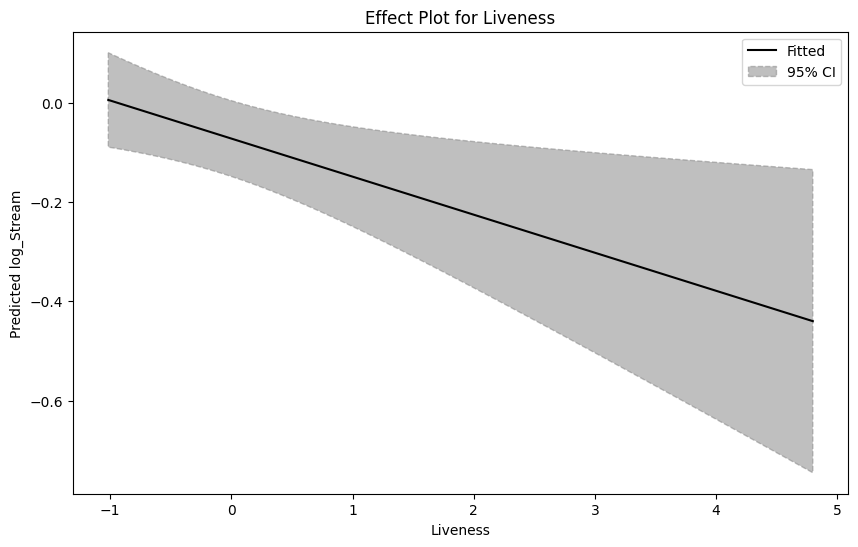

In [454]:
# Define the effect plot function for quantitative variables and interaction
def effect_plot(model, data, variable, fixed_values):
    # Create a DataFrame with a range of values for the variable and fixed values for others
    new_data = pd.DataFrame({
        variable: np.linspace(data[variable].min(), data[variable].max(), 200),
        **{k: v for k, v in fixed_values.items() if k != variable}
    })

    # Manually calculate the interaction term if 'log_Duration_ms:Liveness' is involved
    new_data['log_Duration_ms'] = new_data['log_Duration_ms'] if variable == 'log_Duration_ms' else data['log_Duration_ms'].mean()
    new_data['Liveness'] = new_data['Liveness'] if variable == 'Liveness' else data['Liveness'].mean()
    new_data['log_Duration_ms:Liveness'] = new_data['log_Duration_ms'] * new_data['Liveness']

    # Add quadratic terms
    new_data['I(log_Duration_ms ** 2)'] = new_data['log_Duration_ms'] ** 2
    new_data['I(log_Comments ** 2)'] = new_data['log_Comments'] ** 2

    # Generate predictions and confidence intervals
    predictions = model.get_prediction(new_data)
    predictions_summary = predictions.summary_frame(alpha=0.05)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(new_data[variable], predictions_summary["mean"], color="black")
    
    # Titles and labels
    plt.title(f'Effect Plot for {variable}')
    plt.xlabel(variable)
    plt.ylabel("Predicted log_Stream")
    
    # Confidence intervals
    plt.fill_between(new_data[variable], predictions_summary["mean_ci_lower"], predictions_summary["mean_ci_upper"],
                     color="grey", linestyle='--', alpha=0.5)
    
    # Add legend
    plt.legend(["Fitted", "95% CI"])
    plt.show()

# Set fixed values for other variables, including a constant value for Album_single
fixed_values = {
    'Licensed': data_c['Licensed'].mean(),
    'log_Comments': data_c['log_Comments'].mean(),
    'Liveness': data_c['Liveness'].mean(),
    'Album_single': 0  # or set to 1 if that's more appropriate
}

# List of quantitative predictors and interaction to plot
quantitative_predictors = ['log_Duration_ms', 'log_Comments', 'Liveness']

# Generate effect plots for each quantitative predictor and interaction term
for predictor in quantitative_predictors:
    effect_plot(model_f_updated, data_c, predictor, fixed_values)